In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [3]:
df = pd.read_excel('DIscientomertics.xlsx')

In [4]:
df.dropna(inplace=True)
df = df[df['Citation count']>=1]
df = df[df['Citation count']<1000]

In [5]:
df['DI'] = (df['NG']-df['NR'])/(df['NG']+df['NR']+df['NE'])
df['DI*'] = (df['NG'])/(df['NG']+df['NR']+df['NE'])

In [6]:
df.dropna(inplace=True)

In [7]:
df = df[df['DI*']>0]

In [14]:
# df_describe = pd.DataFrame(df.describe()).T
# df_describe['var'] = df.var()
# df_describe['skewness'] = df.skew()
# df_describe['kurtosis'] = df.kurt()
# df_describe.to_excel('describe.xlsx')

In [8]:
df.sort_values(r'GDI(k=2)')

,meta_inf,doi,ti,Citation count,NG,NR,NE,normalizedNE,GDI(k=2),DI,DI*
616,"Schmoch, U 2019",10.1007/s11192-018-03002-x,Impact assessment of a support programme of sc...,5,1.0,1.0,758.0,126.5,0.014981,0.000000,0.001316
2991,"TODOROV, R 1991",10.1007/BF02018153,"AN OVERVIEW OF MORAVCSIK,MIKE PUBLICATION ACTI...",2,1.0,0.0,601.0,120.4,0.015823,0.001661,0.001661
558,"MOMBERS, C 1985",10.1007/BF02017153,DISPLAYING STRENGTHS AND WEAKNESSES IN NATIONA...,18,1.0,4.0,559.0,112.0,0.016393,-0.005319,0.001773
39,"Kissin, I 2011",10.1007/s11192-011-0403-0,Top Journals Selectivity Index: is it acceptab...,10,1.0,1.0,515.0,103.2,0.018149,0.000000,0.001934
1475,"EXNER, O 1995",10.1007/BF02020185,CITATION HISTORIES OF RELATED PAPERS IN THE FI...,4,1.0,0.0,575.0,96.0,0.019608,0.001736,0.001736
...,...,...,...,...,...,...,...,...,...,...,...
499,"De Moya-Anegon, F 2007",10.1007/s11192-007-1681-4,Coverage analysis of Scopus: A journal metric ...,185,59.0,0.0,0.0,1.0,0.923077,1.000000,1.000000
5065,"BEAVER, DD 1979",10.1007/BF02016966,STUDIES IN SCIENTIFIC COLLABORATION .2. SCIENT...,187,80.0,0.0,0.0,1.0,0.941860,1.000000,1.000000
1256,"SCHUBERT, A 1990",10.1007/BF02130461,"INTERNATIONAL COLLABORATION IN THE SCIENCES, 1...",139,82.0,0.0,0.0,1.0,0.943182,1.000000,1.000000
2563,"SMALL, H 1985",10.1007/BF02017157,CLUSTERING THE SCIENCE CITATION INDEX USING CO...,189,88.0,0.0,0.0,1.0,0.946809,1.000000,1.000000


In [13]:
scipy.stats.pearsonr(df['DI'], df['Citation count'])

(-0.08215523903023633, 1.481659414986216e-06)

In [14]:
scipy.stats.pearsonr(df['DI*'], df['Citation count'])

(-0.06415240212851166, 0.00017239307318235385)

In [15]:
scipy.stats.pearsonr(df[r'GDI(k=2)'], df['Citation count'])

(0.25381809931520327, 1.7579710523377354e-51)

# Linear regression with marginal distributions

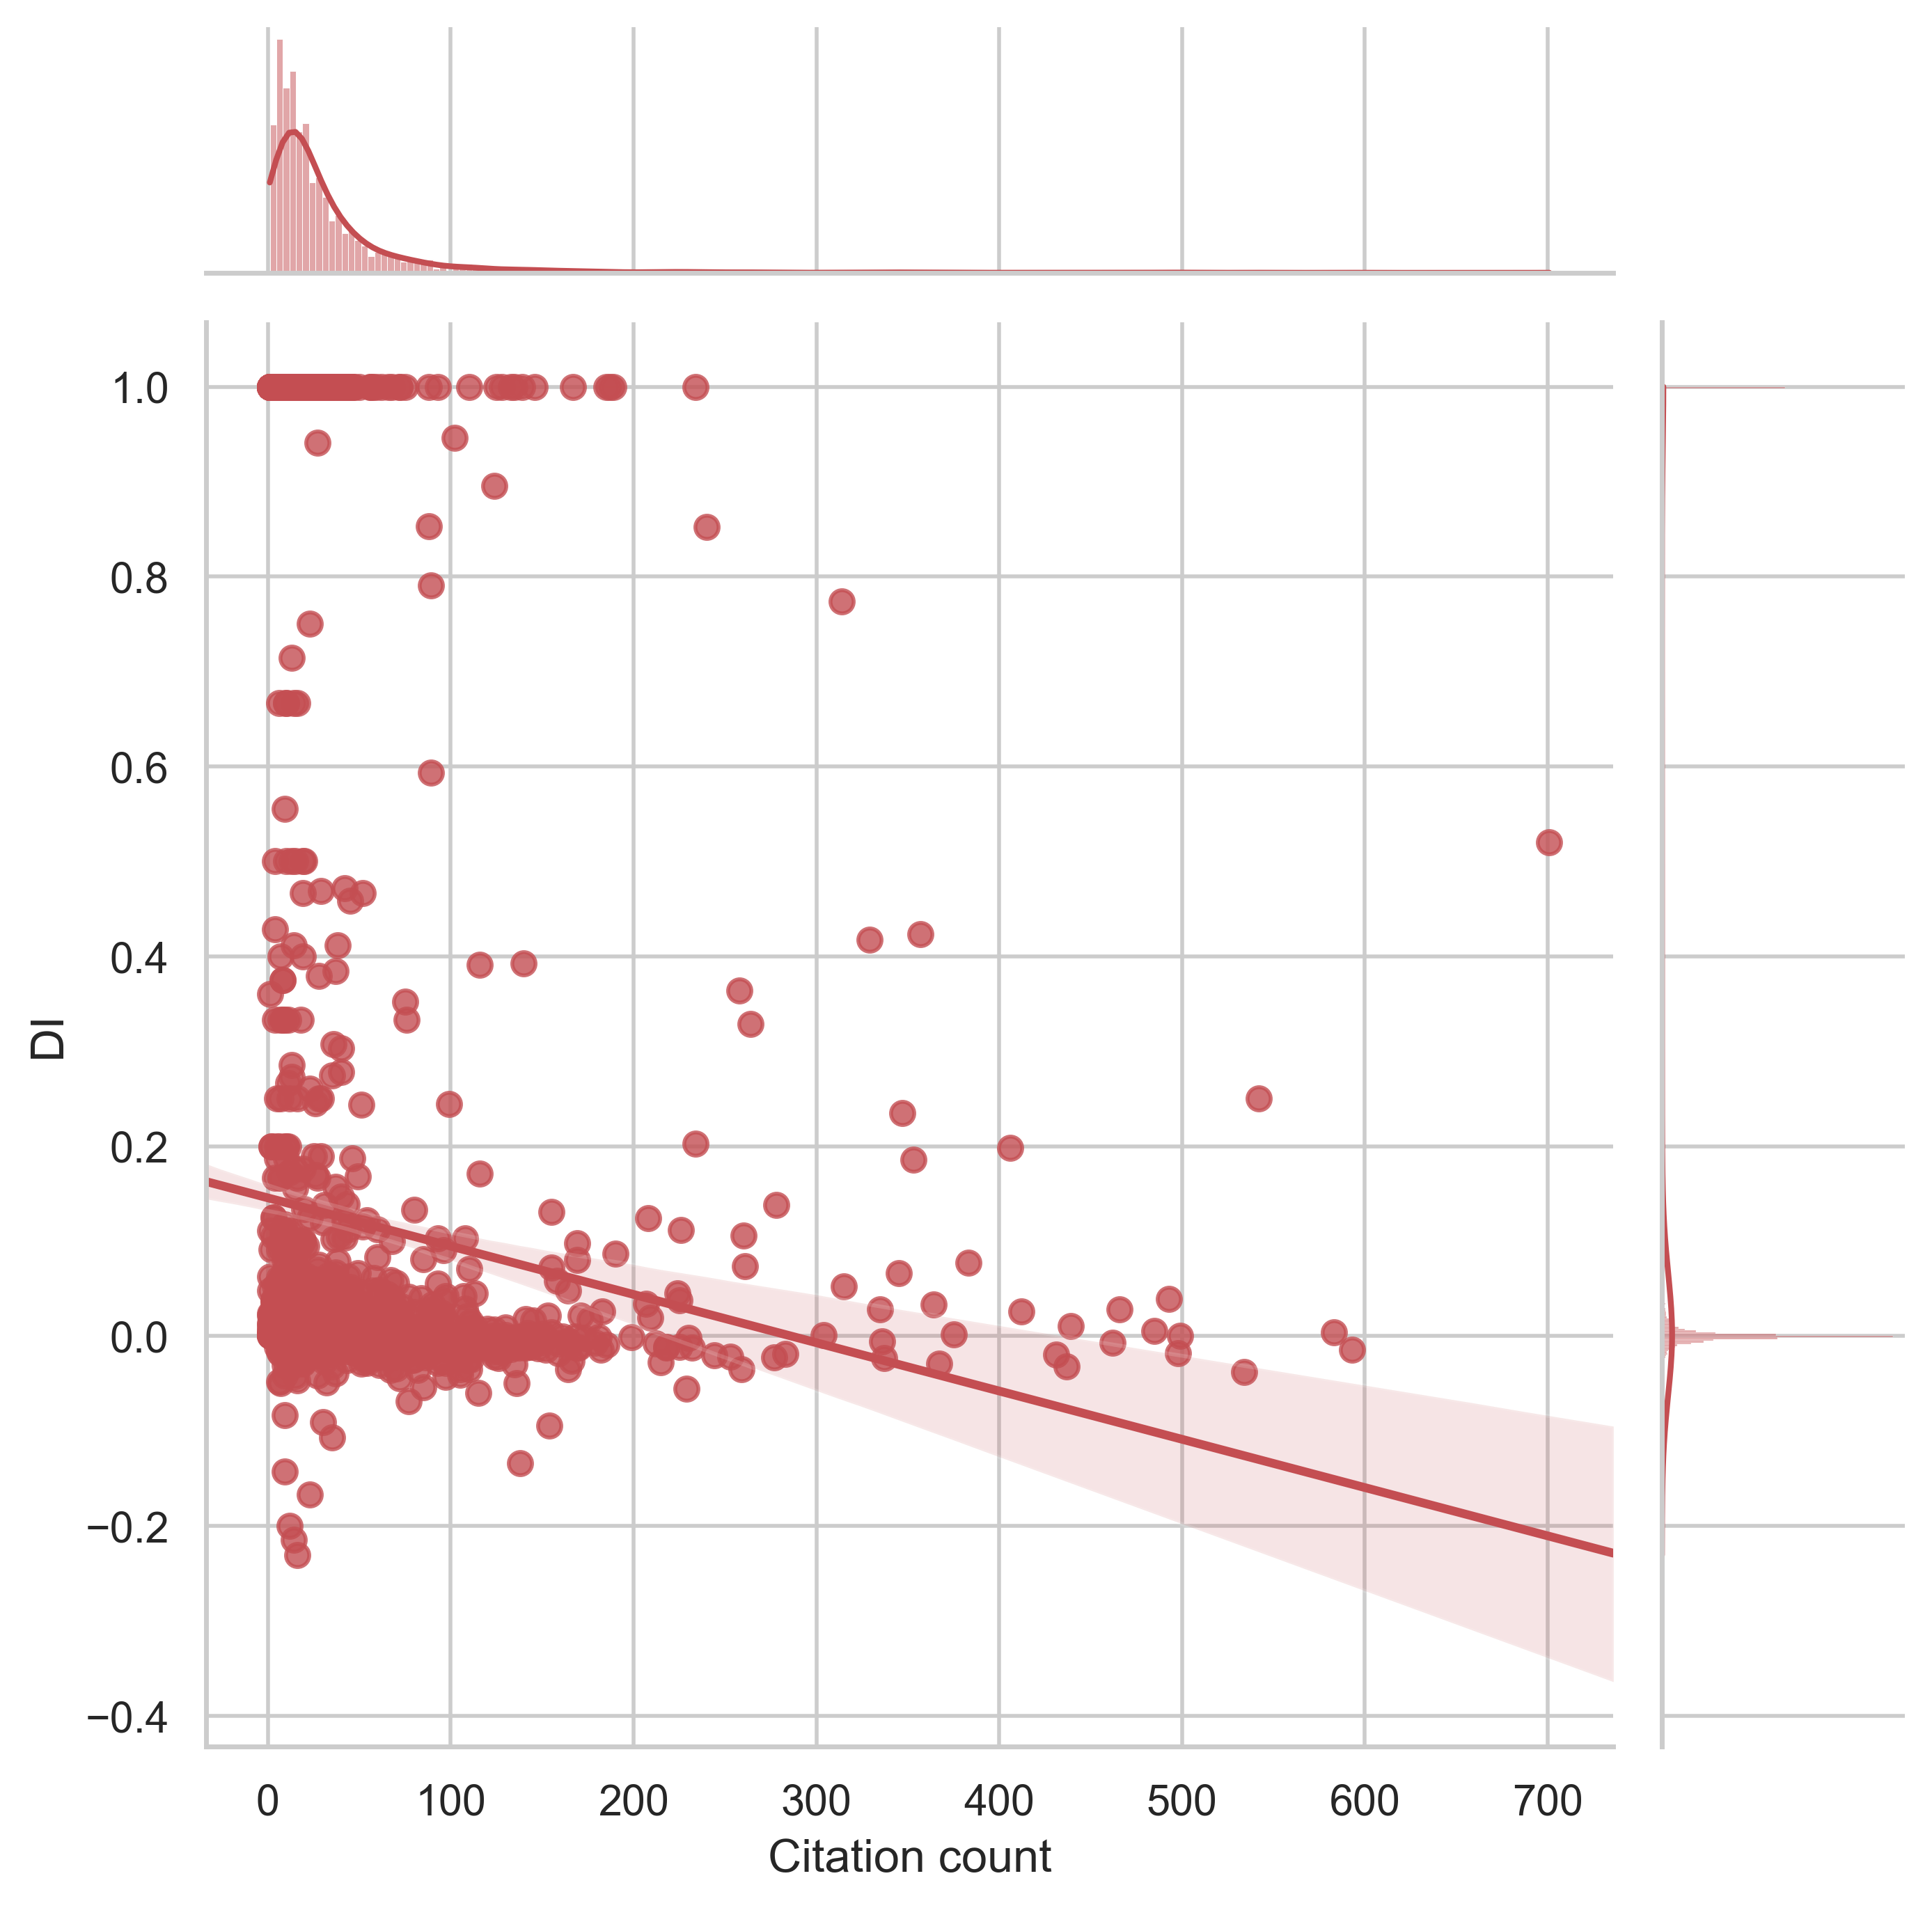

In [10]:
sns.set_theme(style="whitegrid")

g = sns.jointplot(y=r"DI", x="Citation count", data=df,
                  kind="reg", truncate=False,
#                   xlim=(0, 60), ylim=(0, 12),
                  color="r", height=7)

g.figure.dpi = 400

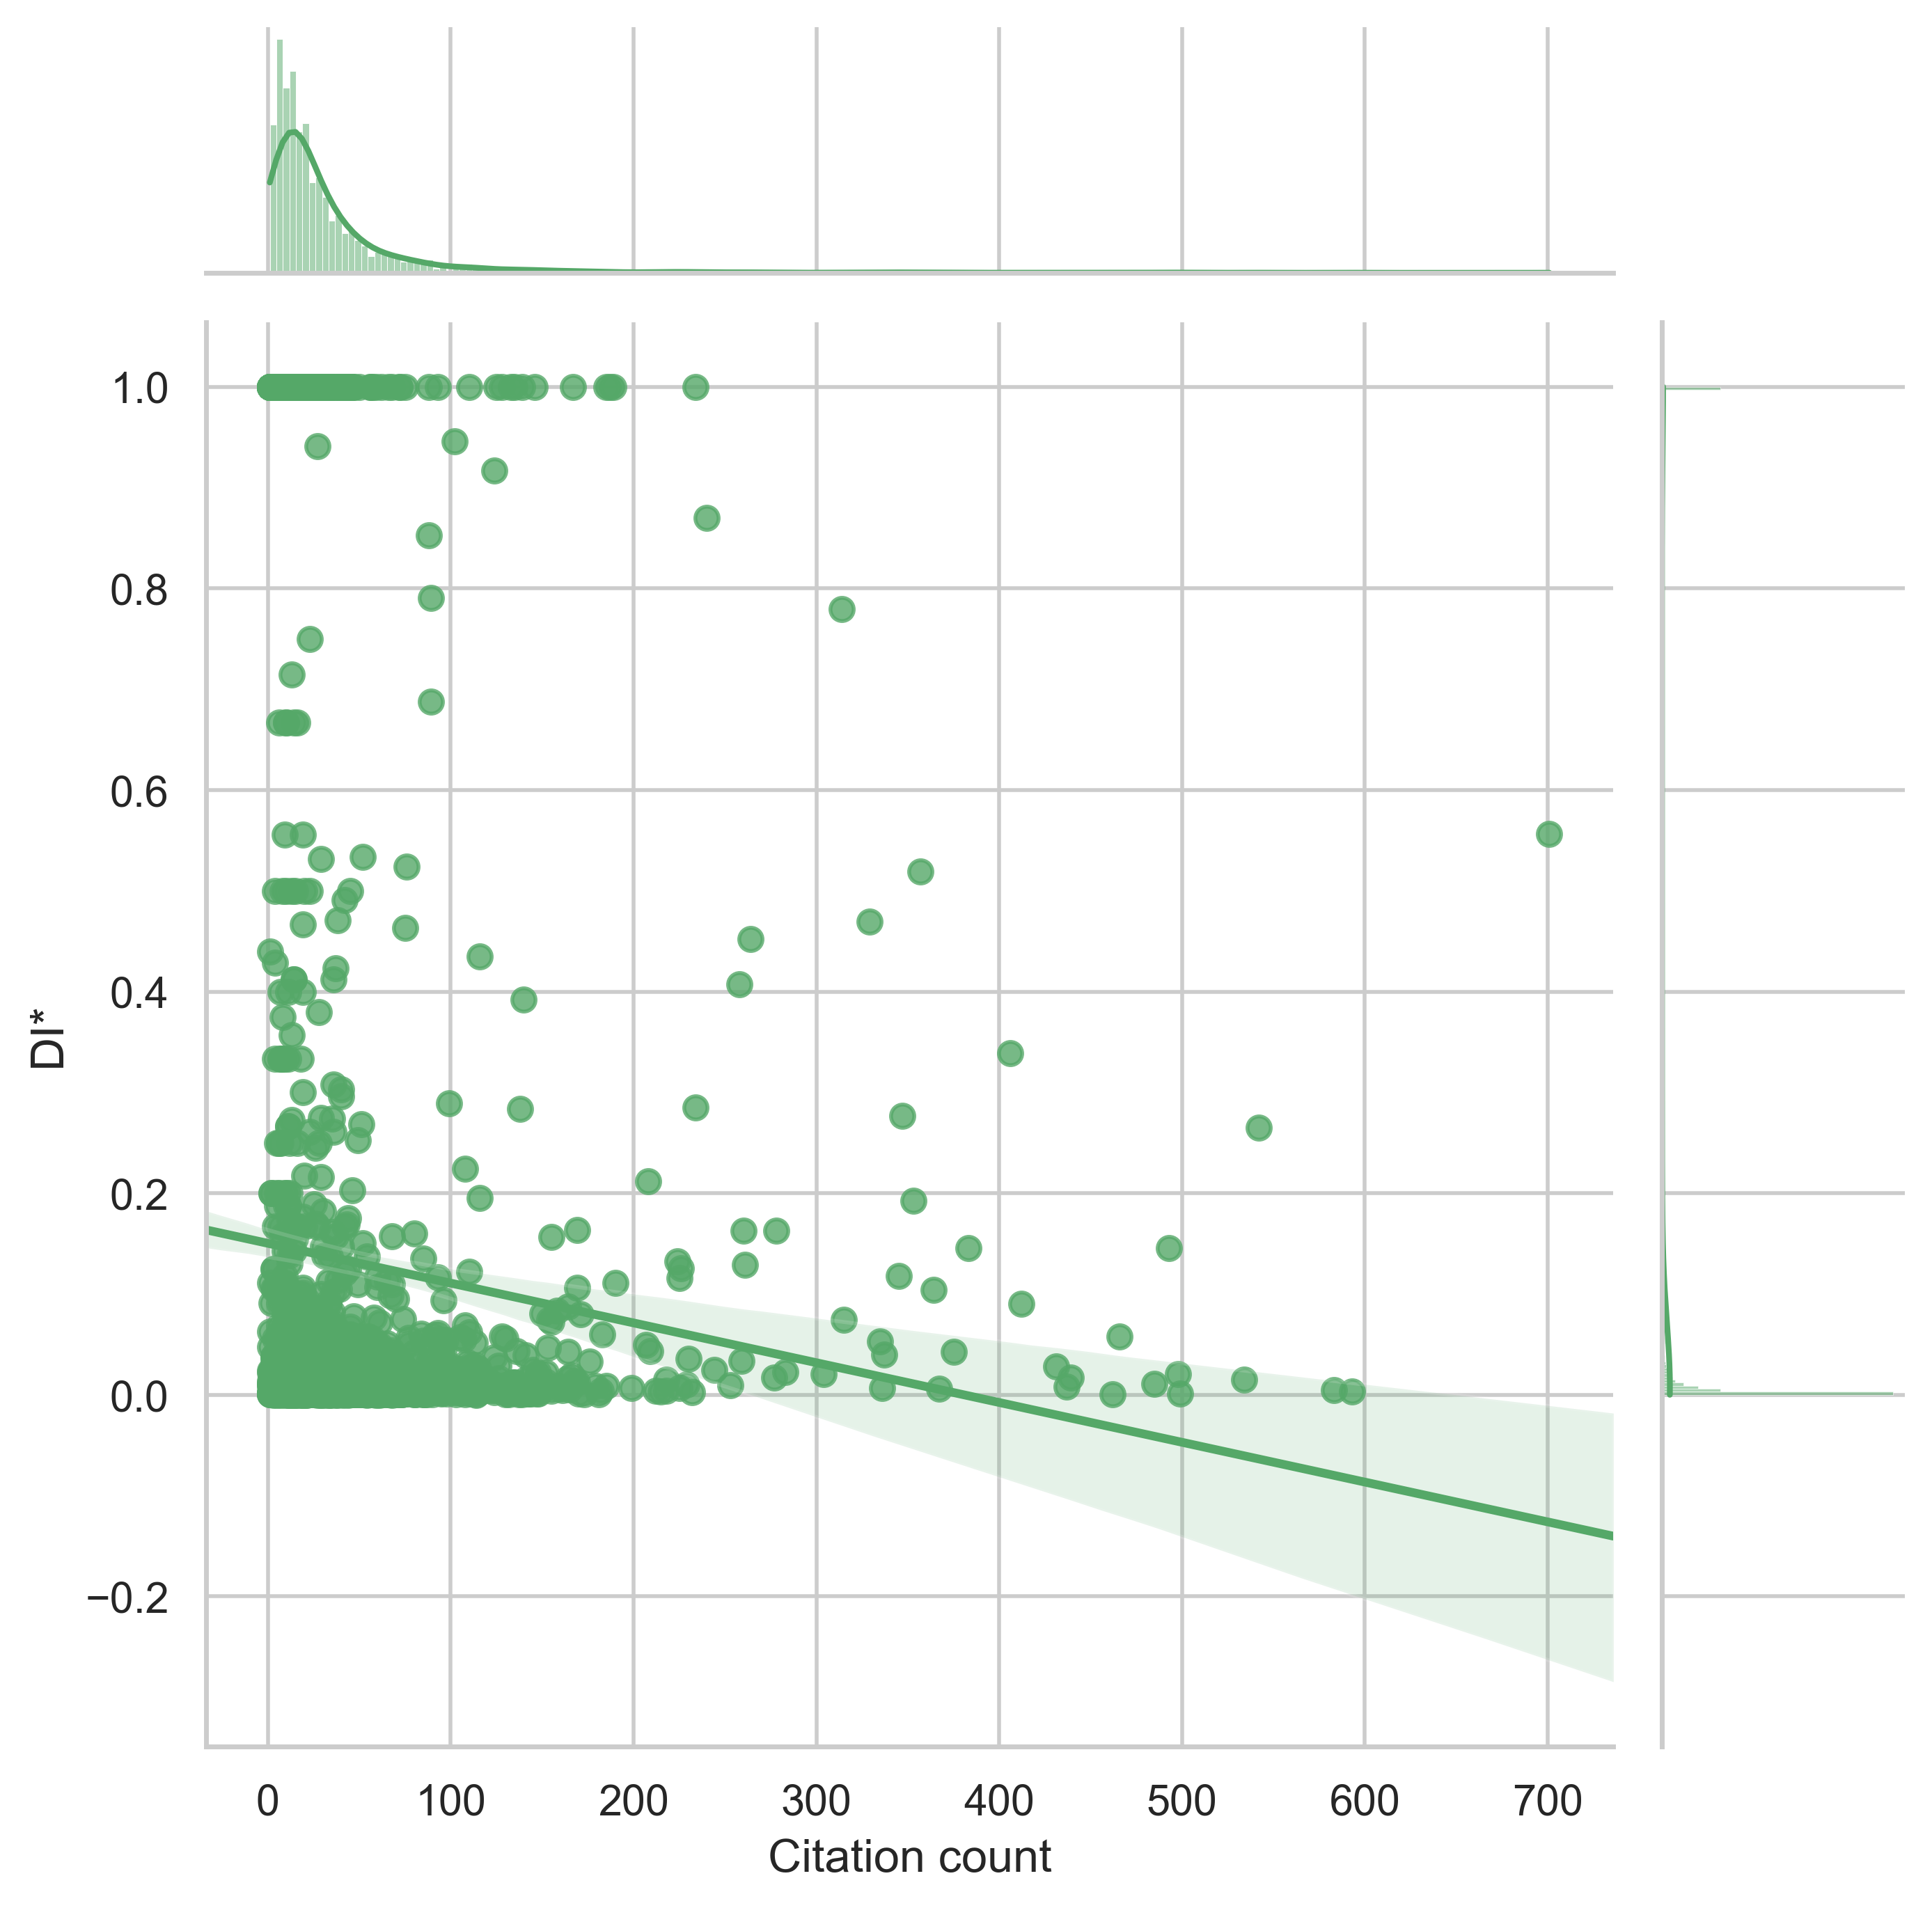

In [11]:
sns.set_theme(style="whitegrid")

g = sns.jointplot(y=r"DI*", x="Citation count", data=df,
                  kind="reg", truncate=False,
#                   xlim=(0, 60), ylim=(0, 12),
                  color="g", height=7)

g.figure.dpi = 400

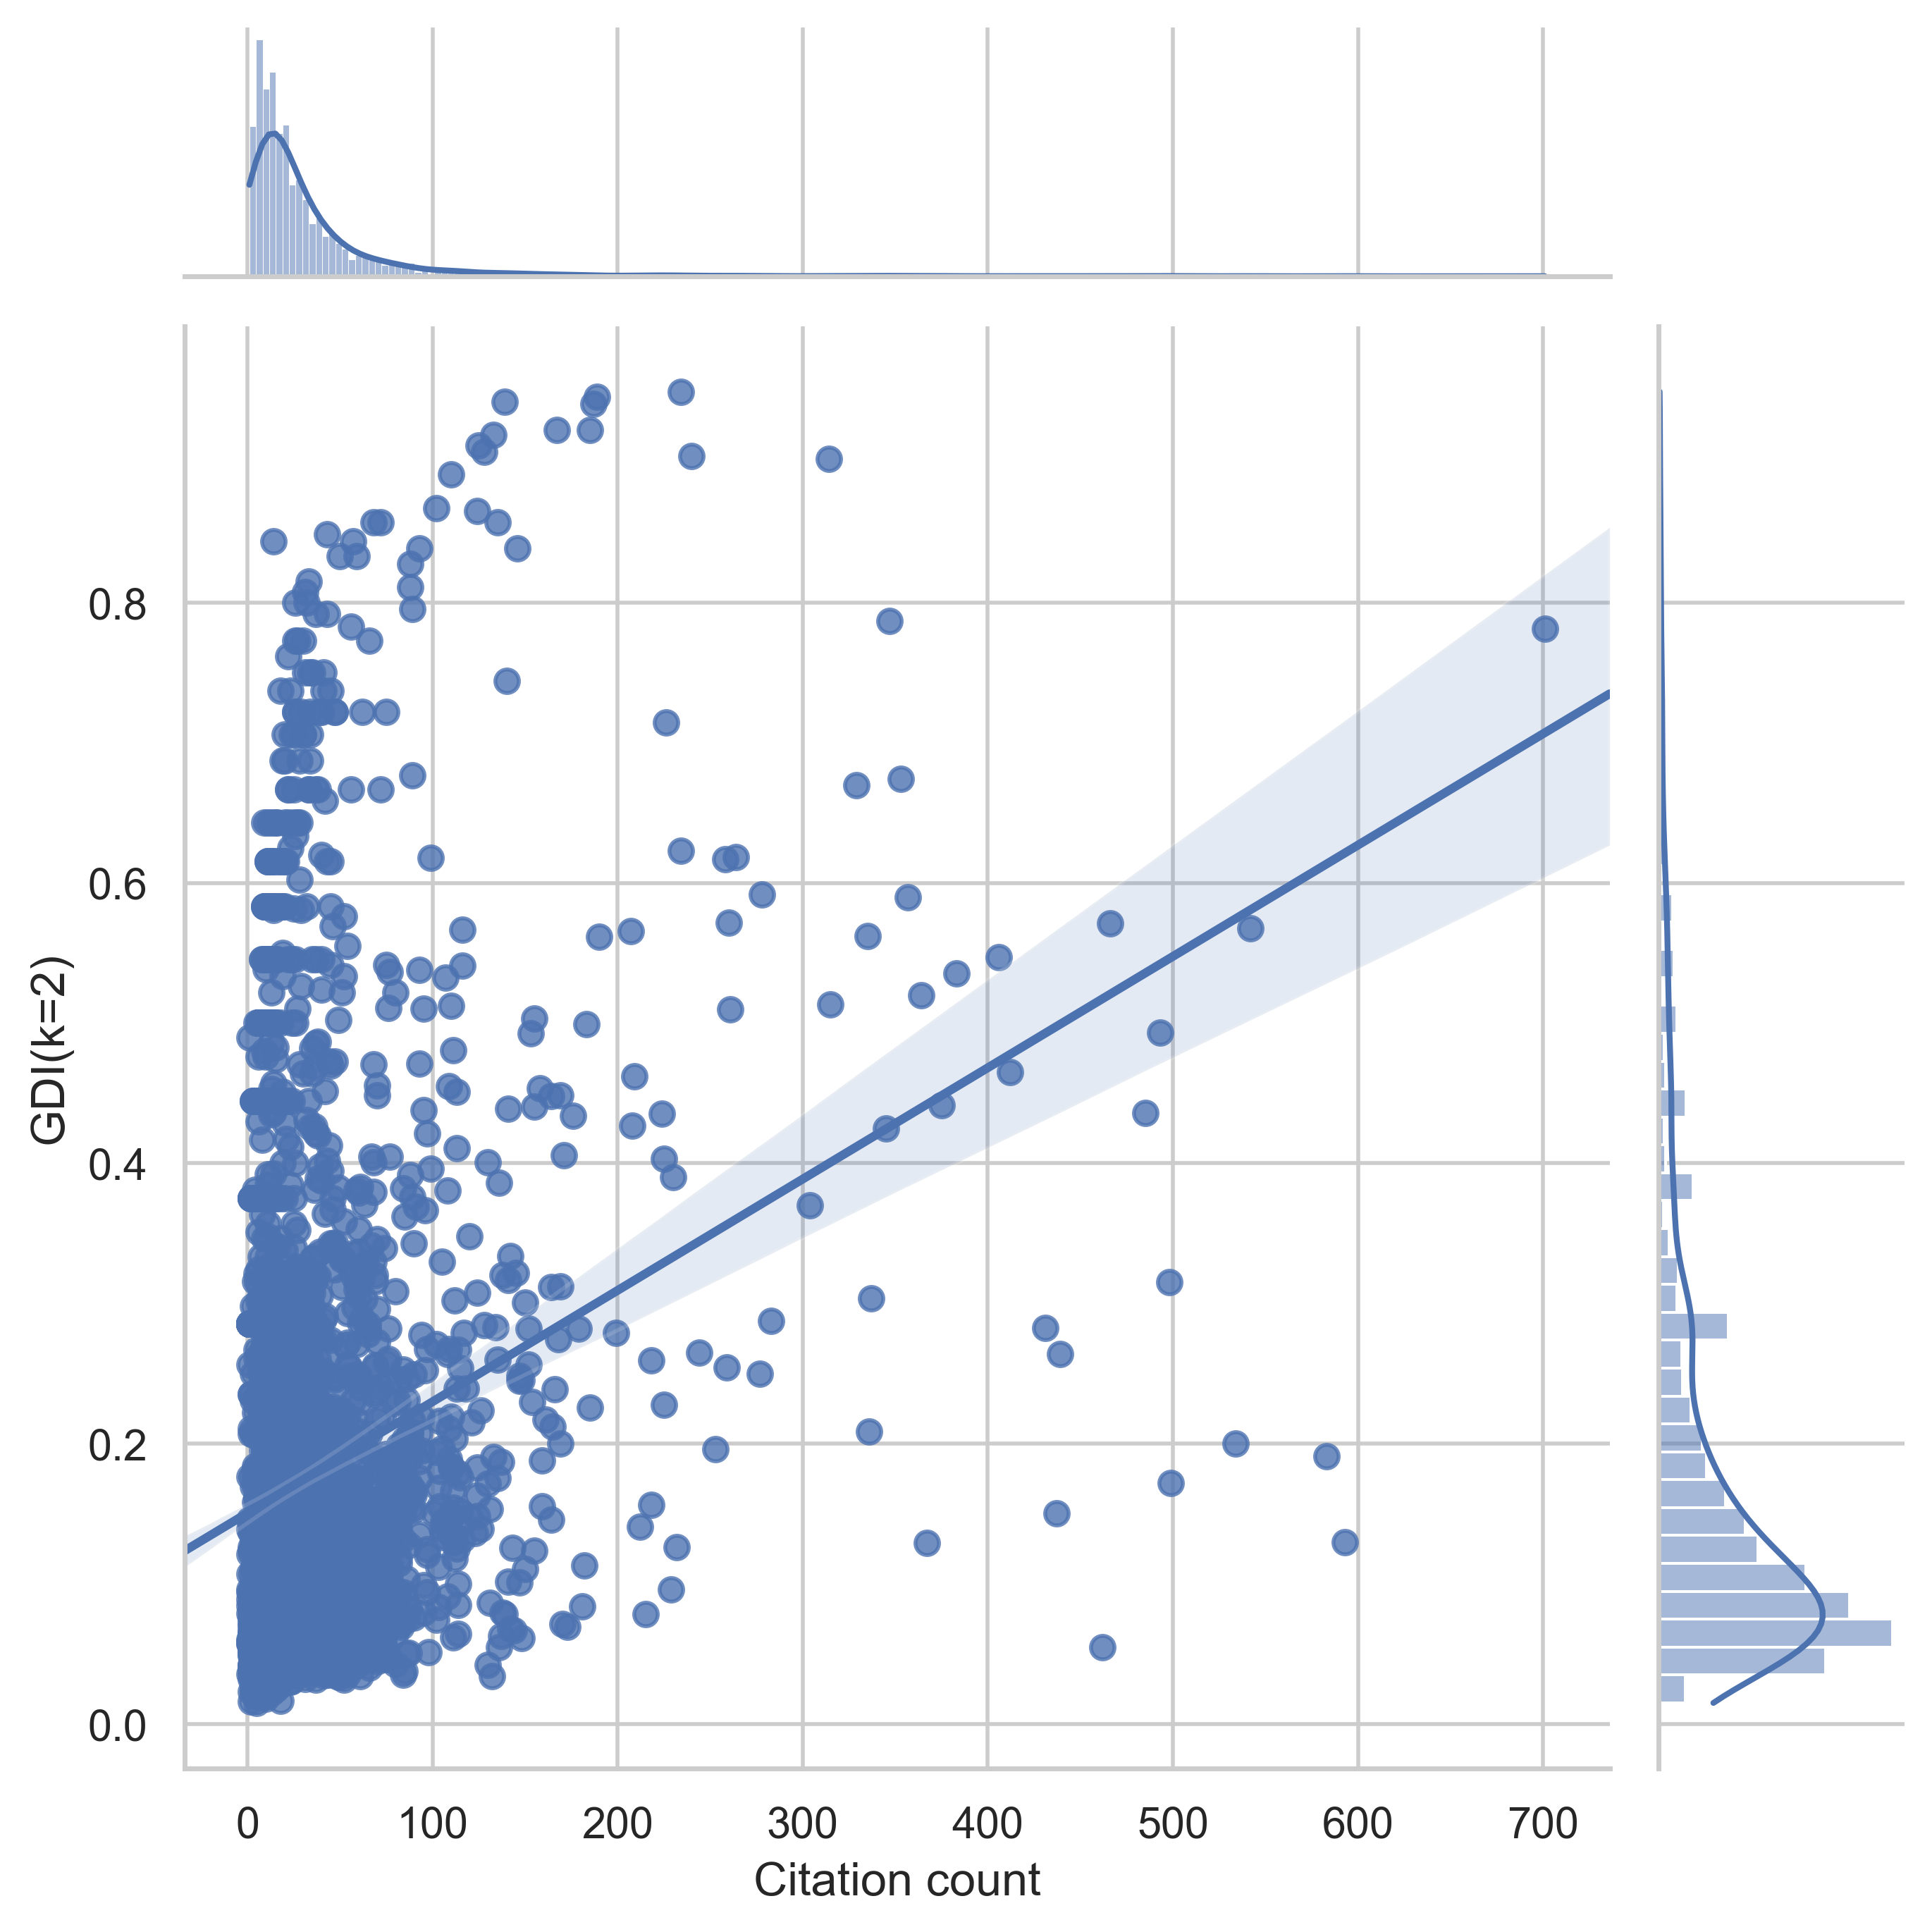

In [12]:
sns.set_theme(style="whitegrid")

g = sns.jointplot(y=r"GDI(k=2)", x="Citation count", data=df,
                  kind="reg", truncate=False,
#                   xlim=(0, 60), ylim=(0, 12),
                  color="b", height=7)

g.figure.dpi = 400